<a href="https://colab.research.google.com/github/Luizfern-coder/Luizfern-coder/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 3 - KNN

Aprendizado Supervisionado

1. modelo para ajustar
2. uma métrica para otimizar
3. um método para validar

Algoritmo KNN

1. objetos com caracteristicas semelhantes percetem ao mesmo grupo
2. diga-me cmo quem andas e te direi quem és
3. como seus 'vizinhos' te influenciam
4. Pode ser usado no contexto de classificação e regressão 

- O Algoritmo é sensivel a seleção de K 

- Custoso computacionalmente 

- a maldição da dimensionalidade

- as fronteiras de decisão podem assumir diversas formas




In [2]:
import pandas as pd
url =  'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#separação dos dados
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no':0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


#Upgrade na Técnica de Validação: HOLDOUT Repetido

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter um valor mais estável para o EQM. 

In [4]:
from sklearn.linear_model import LinearRegression #modelo
from sklearn.metrics import mean_squared_error # metrica
from sklearn.model_selection import train_test_split #validacao

import numpy as np

R = 1000
eqms = []

X = dados[['bmi', 'smoker']]
y = dados['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    eqms.append(eqm)

print(np.mean(eqms))

50.52213017332337


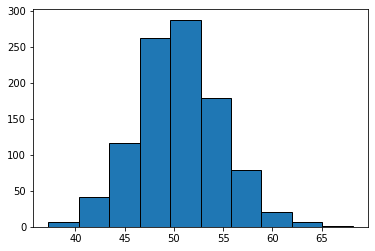

In [5]:
import matplotlib.pyplot as plt
plt.hist(eqms, edgecolor = 'black')
plt.show()

## Modelo - KNN Vizinhos mais Próximos

In [9]:
from sklearn.neighbors import KNeighborsRegressor

k = 7

R = 100

eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino)

    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = knn.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)

print('O EQM de Treino foi : {:.2f}'.format(np.mean(eqms_treino)))
print('O EQM de Teste foi : {:.2f}'.format(np.mean(eqms_teste)))

O EQM de Treino foi : 122.56
O EQM de Teste foi : 164.23


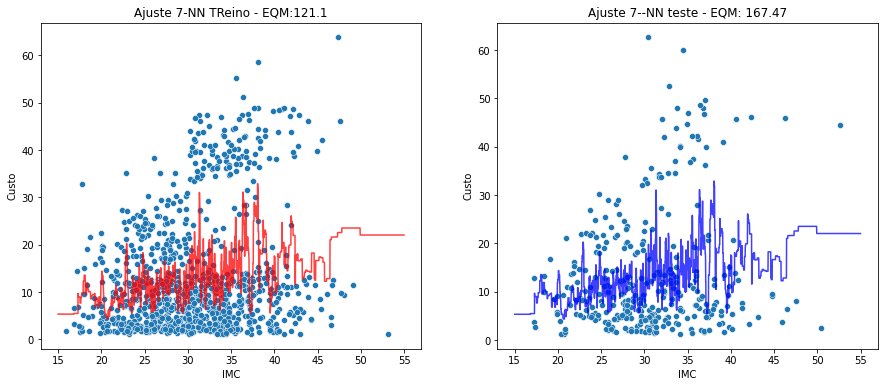

In [11]:
# Gráfico do KNN com 1 Variavel

import matplotlib.pyplot as plt
import seaborn as sns

X = dados [['bmi']]
y = dados ['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))


plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x= Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TReino - EQM:'.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}--NN teste - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

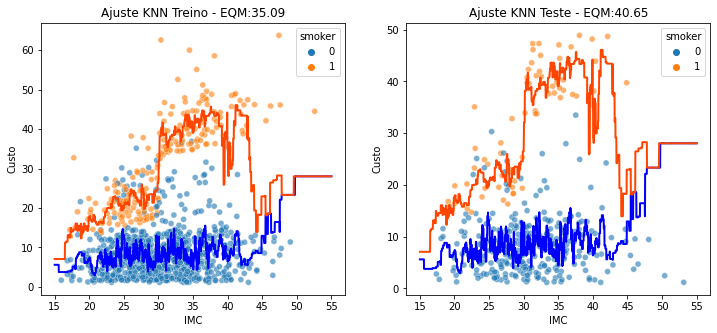

In [22]:
# Gráfico do modelo com 2 variaveis

X = dados[['bmi', 'smoker']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size= 0.25)

k = 7

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue = Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN Treino - EQM:' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue = Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color='blue', linewidth = 2)
plt.plot(x, d1, '-', color='orangered', linewidth = 2)
plt.title('Ajuste KNN Teste - EQM:' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')

plt.show()

## Comparação de modelos



In [28]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25):

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino, Xteste, ytreino, yteste = train_test_split(X, y, test_size = proporcao)

        #treinando o modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino)
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste,preditos_teste)

        #guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)

    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de Treino: {}'.format(res_treino))
    print('EQM médio de Teste: {}'.format(res_teste))

    return res_treino, res_teste

In [29]:
HoldoutRepetido(modelo = KNeighborsRegressor())

EQM médio de Treino: 31.4
EQM médio de Teste: 46.85


(31.4, 46.85)

In [30]:
HoldoutRepetido(KNeighborsRegressor(n_neighbors = 20))

EQM médio de Treino: 48.69
EQM médio de Teste: 54.31


(48.69, 54.31)

In [31]:
from scipy.special import kn
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(),
           KNeighborsRegressor(n_neighbors = 5),
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors= 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),]

nomes = ['Regressão Linear',
         'KNN - K = 5',
         'KNN - K = 15',
         'KNN - K = 25',
         'KNN - K = 35',
         'KNN - K = 45']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de Treino: 50.19
EQM médio de Teste: 50.11
EQM médio de Treino: 31.23
EQM médio de Teste: 47.22
EQM médio de Treino: 44.45
EQM médio de Teste: 49.38
EQM médio de Treino: 53.79
EQM médio de Teste: 60.58
EQM médio de Treino: 67.52
EQM médio de Teste: 73.48
EQM médio de Treino: 80.35
EQM médio de Teste: 84.2


,EQM Treino,EQM Teste
KNN - K = 5,31.23,47.22
KNN - K = 15,44.45,49.38
Regressão Linear,50.19,50.11
KNN - K = 25,53.79,60.58
KNN - K = 35,67.52,73.48
KNN - K = 45,80.35,84.20
